## Import

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer as Imputer

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score
import lightgbm as lgb

In [2]:
app_train = pd.read_csv('application_train.csv')
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
app_test = pd.read_csv('application_test.csv')
print(app_test.shape)
app_test.head()

(48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


## EDA

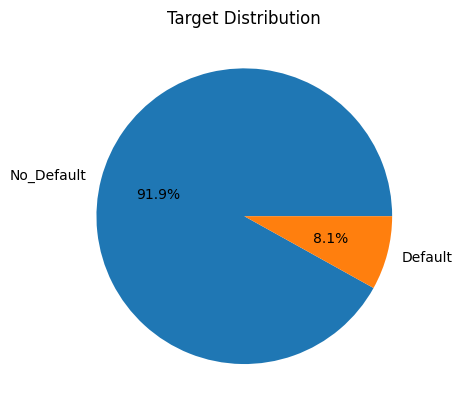

In [4]:
fig, ax = plt.subplots()
ax.pie(app_train['TARGET'].value_counts(), labels = ['No_Default', 'Default'], autopct='%1.1f%%')
ax.set_title('Target Distribution')
None

In [5]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

        print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        return mis_val_table_ren_columns

In [6]:
# Missing values statistics
missing_values = missing_values_table(app_train)
pd.set_option('display.max_rows', None)
missing_values.head(70)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


In [7]:
pd.set_option('display.max_rows', 20)

In [8]:
# Number of each type of column
app_train.dtypes.value_counts()

,count
float64,65
int64,41
object,16


In [9]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

,0
NAME_CONTRACT_TYPE,2
CODE_GENDER,3
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE,7
NAME_INCOME_TYPE,8
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,6
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,18


In [10]:
# # If 2 or fewer unique categories
# le = LabelEncoder()
# for col in app_train:
#     if app_train[col].dtype == 'object':
#         if len(list(app_train[col].unique())) <= 2:
#             le.fit(app_train[col])
#             app_train[col] = le.transform(app_train[col])
#             app_test[col] = le.transform(app_test[col])

In [11]:
# # one-hot encoding
# app_train = pd.get_dummies(app_train)
# app_test = pd.get_dummies(app_test)

# print('Training Features shape: ', app_train.shape)
# print('Testing Features shape: ', app_test.shape)

In [12]:
# OneHotEncoder works better than the variant above
categorical = app_train.select_dtypes('object').columns
encoder = OneHotEncoder(handle_unknown='ignore',drop='first',sparse_output=False)

In [13]:
one_hot_encoded = encoder.fit_transform(app_train[categorical])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical))
app_train = pd.concat([app_train.drop(categorical, axis=1), one_hot_df], axis=1)
app_train.shape

(307511, 236)

In [14]:
one_hot_encoded = encoder.transform(app_test[categorical])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical))
app_test = pd.concat([app_test.drop(categorical, axis=1), one_hot_df], axis=1)
app_test.shape

(48744, 235)

In [15]:
train_labels = app_train['TARGET']
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 236)
Testing Features shape:  (48744, 235)


In [16]:
(app_train['DAYS_BIRTH'] / -365).describe()
# All good

,DAYS_BIRTH
count,307511.000000
mean,43.936973
std,11.956133
min,20.517808
25%,34.008219
50%,43.150685
75%,53.923288
max,69.120548


### DAYS_EMPLOYED

In [17]:
app_train['DAYS_EMPLOYED'].describe()
# Not good

,DAYS_EMPLOYED
count,307511.000000
mean,63815.045904
std,141275.766519
min,-17912.000000
25%,-2760.000000
50%,-1213.000000
75%,-289.000000
max,365243.000000


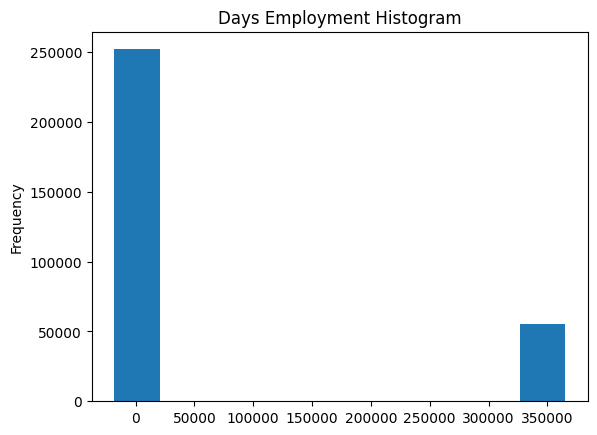

In [18]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');

In [19]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


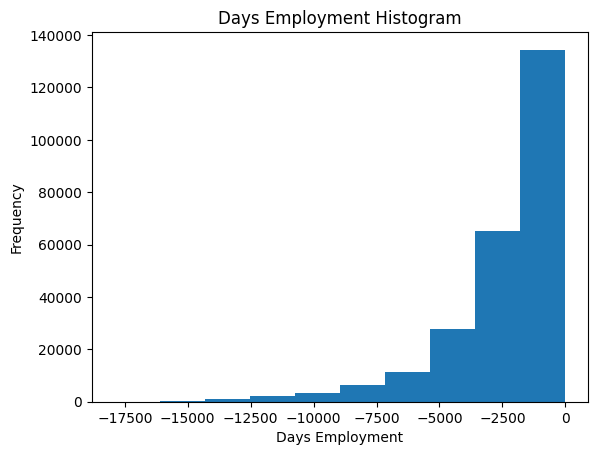

In [20]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [21]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)
print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


### Correlations

In [22]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [23]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

np.float64(-0.07823930830982694)

### Age

Text(0, 0.5, 'Count')

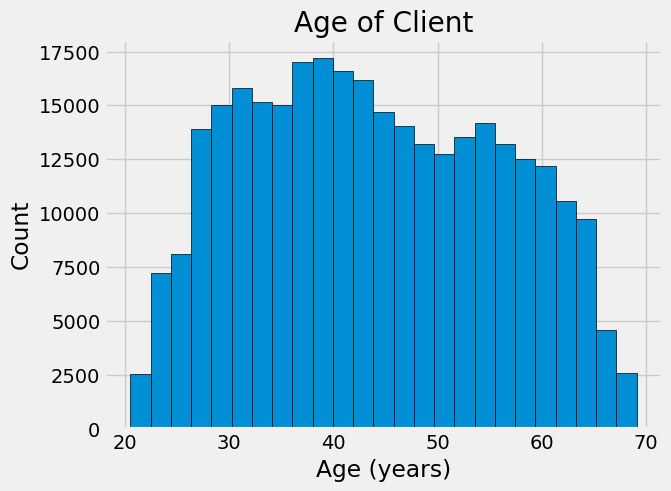

In [24]:
plt.style.use('fivethirtyeight')
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count')

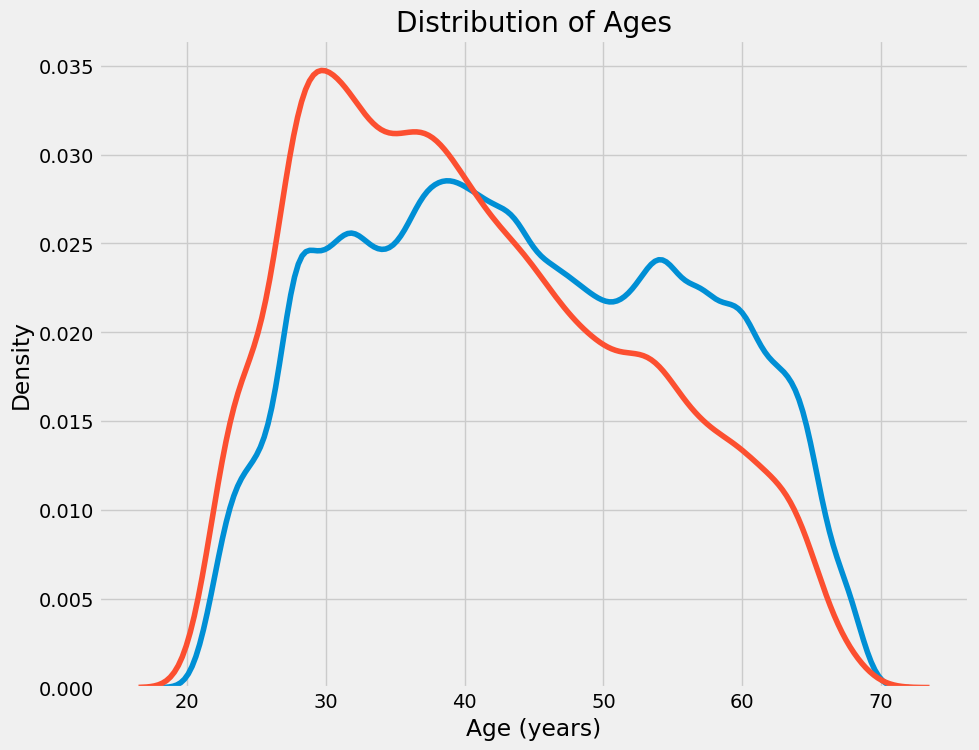

In [25]:
plt.figure(figsize = (10, 8))
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [26]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [27]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

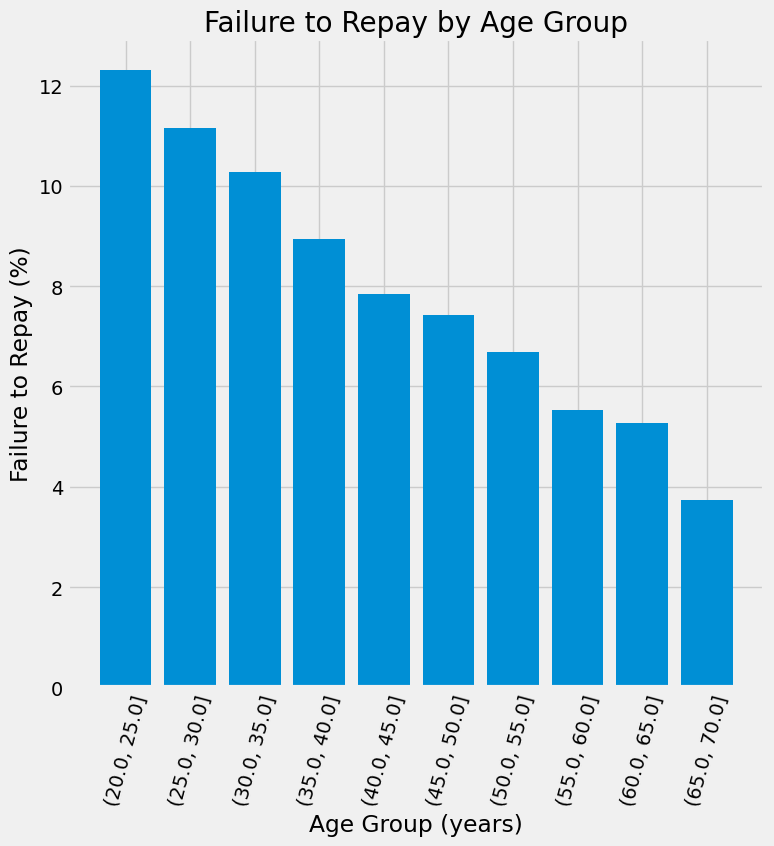

In [28]:
plt.figure(figsize = (8, 8))
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

### EXT_SOURCE

In [29]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


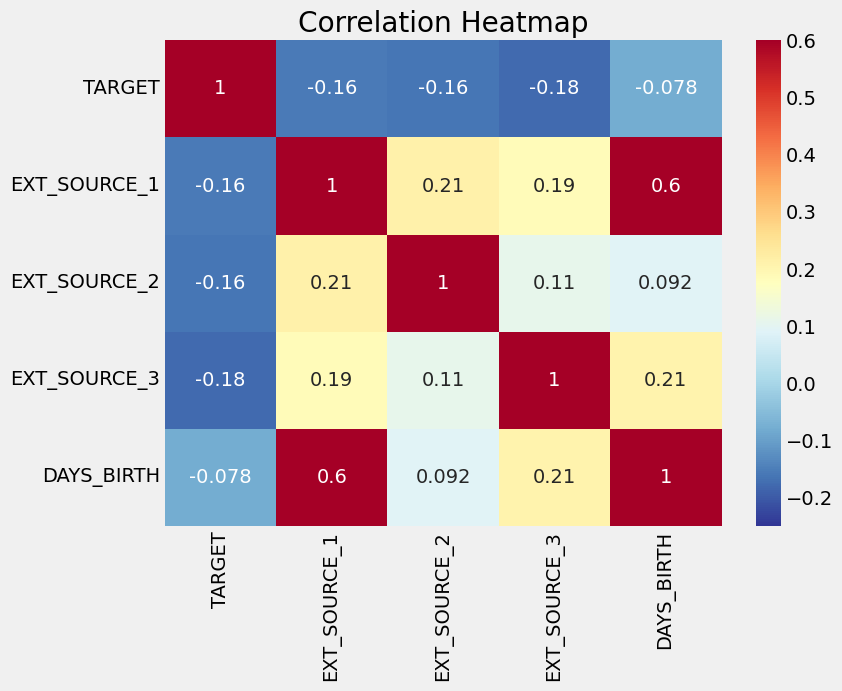

In [30]:
# Heatmap of correlations
plt.figure(figsize = (8, 6))
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

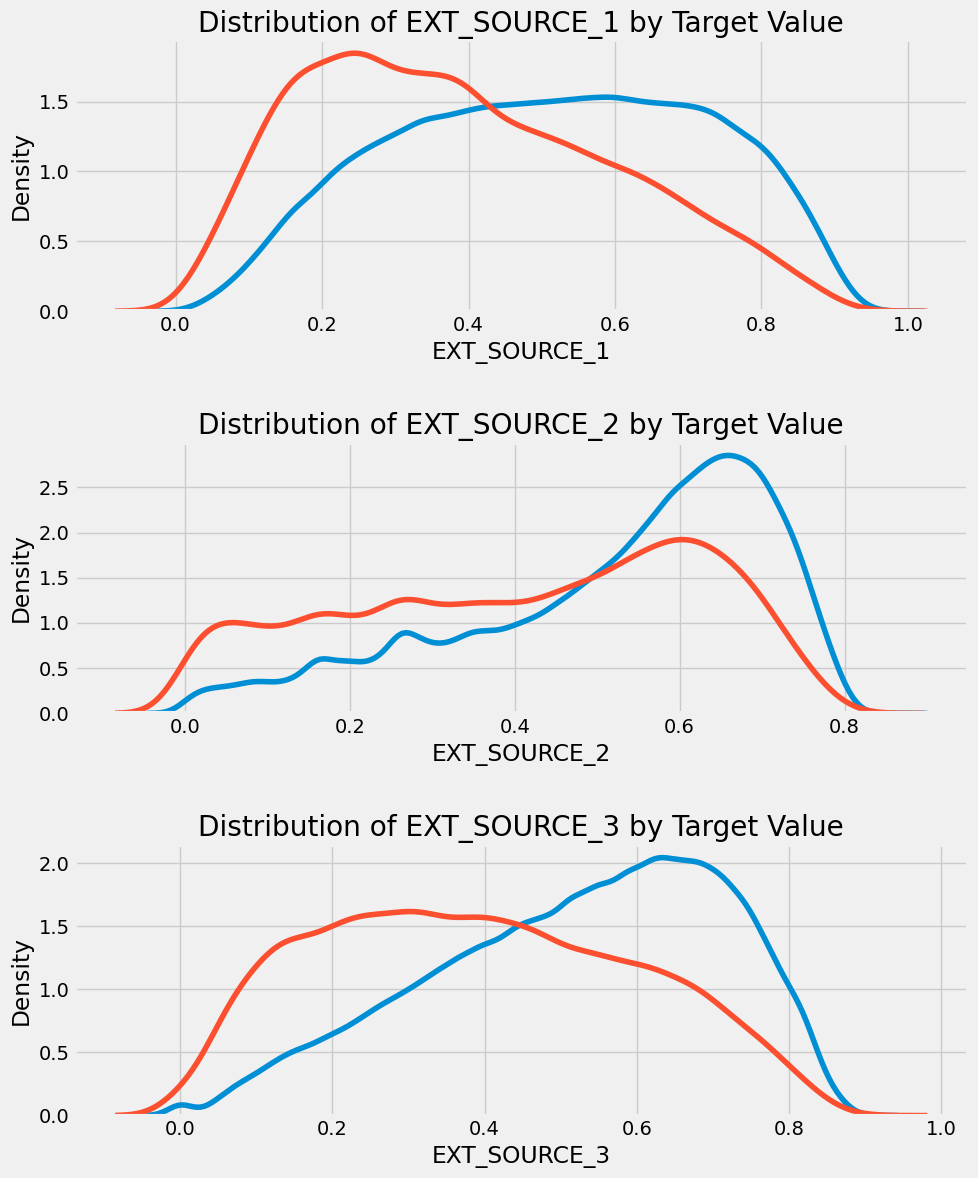

In [31]:
plt.figure(figsize = (10, 12))
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
plt.tight_layout(h_pad = 2.5)

## Polynomial features

In [32]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

imputer = Imputer(strategy = 'median')
poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [33]:
poly_transformer.fit(poly_features)
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [34]:
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

In [35]:
poly_features = pd.DataFrame(poly_features,
                             columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2',
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features['TARGET'] = poly_target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive correlatoins
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [36]:
poly_features_test = pd.DataFrame(poly_features_test,
                                  columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2',
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))
# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 271)
Testing data with polynomial features shape:   (48744, 271)


## Additional features

In [37]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [38]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

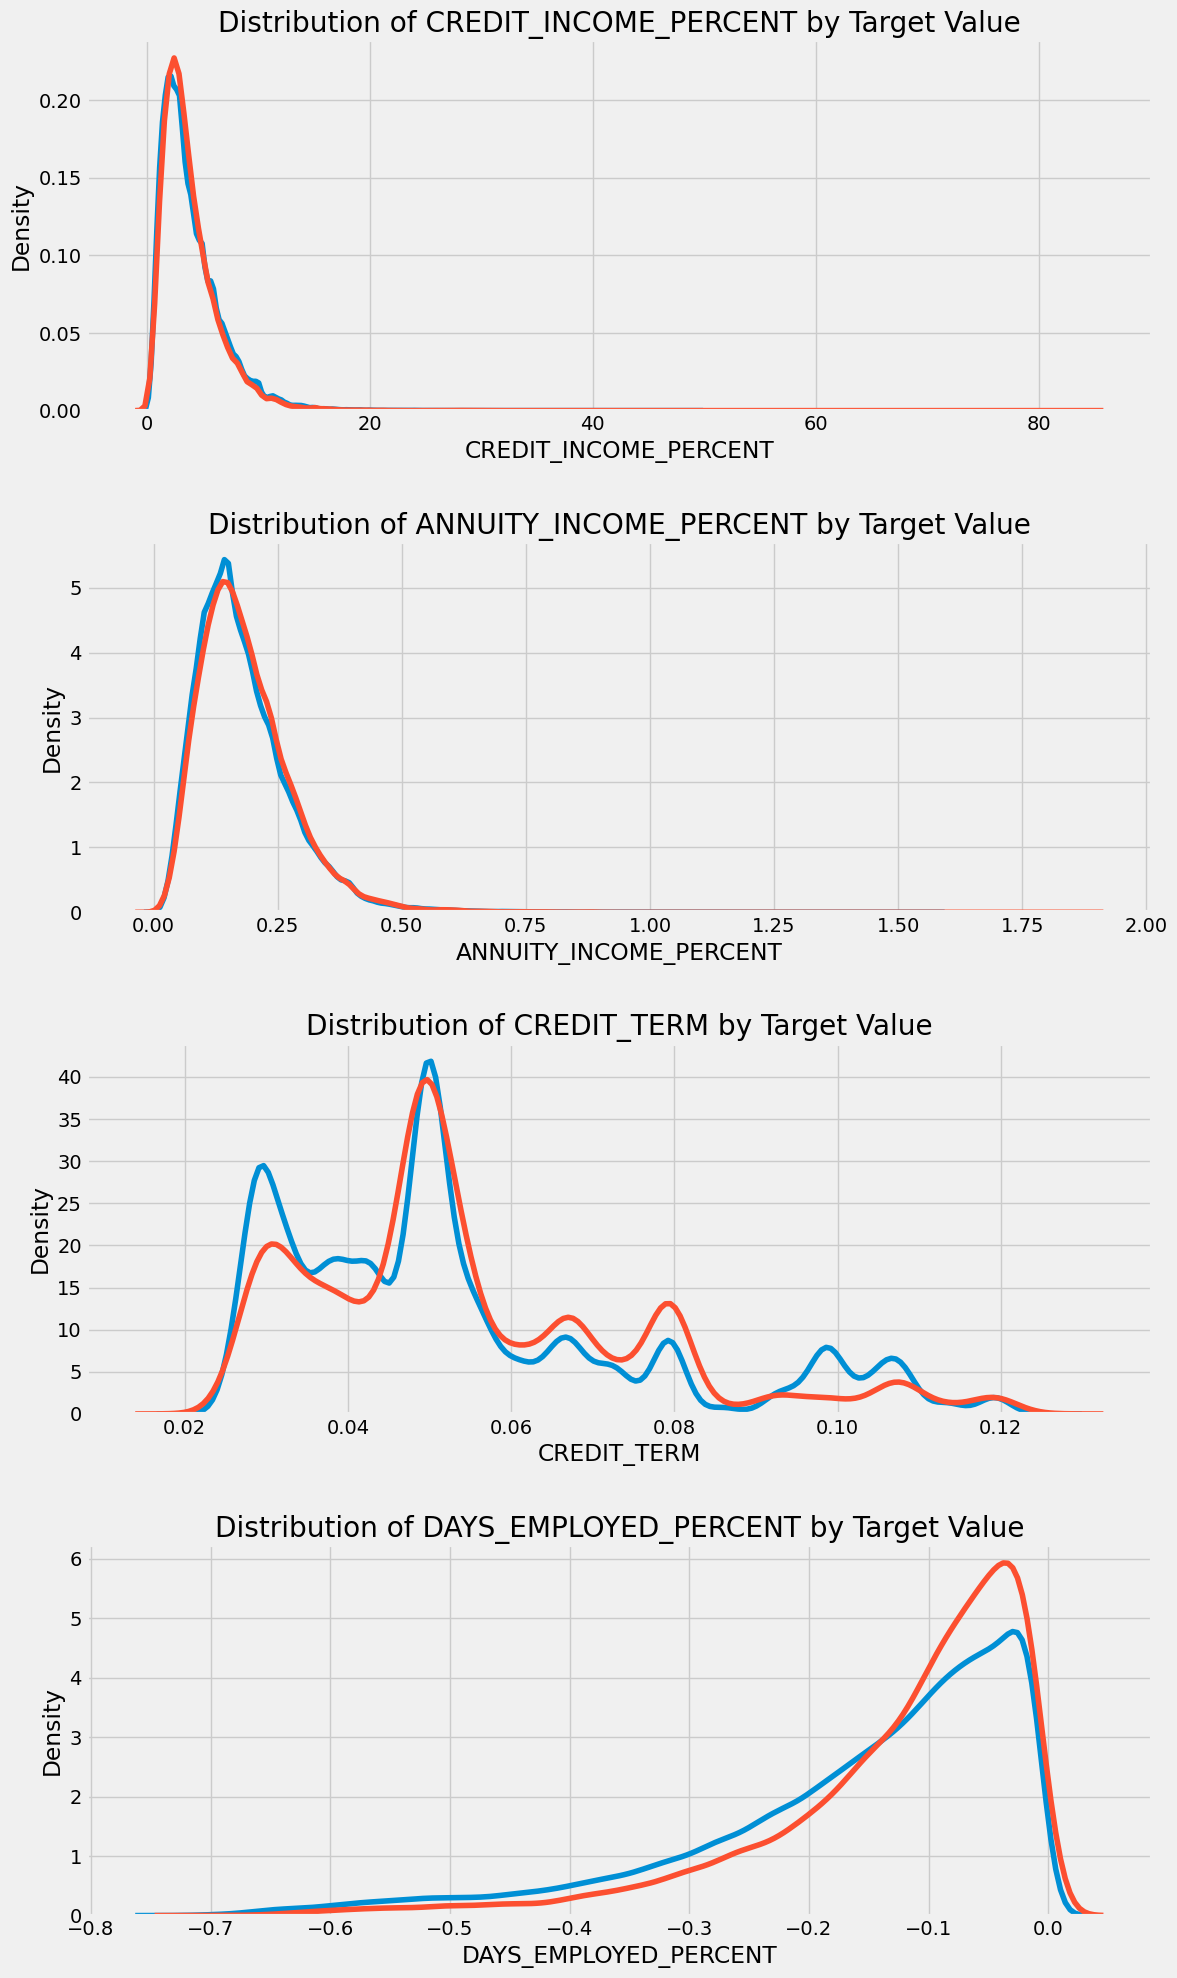

In [39]:
plt.figure(figsize = (12, 20))
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    plt.subplot(4, 1, i + 1)
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
plt.tight_layout(h_pad = 2.5)

In [40]:
app_train

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WALLSMATERIAL_MODE_nan,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan,TARGET,DAYS_EMPLOYED_ANOM
0,100002,0,202500.0,406597.5,24700.5,351000.0,0.018801,9461,-637.0,-3648.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,False
1,100003,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,-1188.0,-1186.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,False
2,100004,0,67500.0,135000.0,6750.0,135000.0,0.010032,19046,-225.0,-4260.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,False
3,100006,0,135000.0,312682.5,29686.5,297000.0,0.008019,19005,-3039.0,-9833.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,False
4,100007,0,121500.0,513000.0,21865.5,513000.0,0.028663,19932,-3038.0,-4311.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,157500.0,254700.0,27558.0,225000.0,0.032561,9327,-236.0,-8456.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,False
307507,456252,0,72000.0,269550.0,12001.5,225000.0,0.025164,20775,NaN,-4388.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,True
307508,456253,0,153000.0,677664.0,29979.0,585000.0,0.005002,14966,-7921.0,-6737.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,False
307509,456254,0,171000.0,370107.0,20205.0,319500.0,0.005313,11961,-4786.0,-2562.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,False


## With default features

In [41]:
# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
features = list(train.columns)
test = app_test.copy()
imputer = Imputer(strategy = 'median')
scaler = MinMaxScaler(feature_range = (0, 1))

imputer.fit(train)
train = imputer.transform(train)
test = imputer.transform(app_test)

scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 236)
Testing data shape:  (48744, 236)


In [42]:
app_train['TARGET'].value_counts() / len(app_train)
weights = {0: 8, 1: 92}

### LogisticRegression

In [43]:
log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(train, train_labels)

log_reg_pred = log_reg.predict_proba(test)[:, 1]
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred
submit.to_csv('log_reg_1.csv', index = False)
submit.head()
# 0.67901

,SK_ID_CURR,TARGET
0,100001,0.064933
1,100005,0.114394
2,100013,0.067255
3,100028,0.071966
4,100038,0.112285


In [44]:
log_reg = LogisticRegression(C = 0.0001, class_weight='balanced')
log_reg.fit(train, train_labels)

log_reg_pred = log_reg.predict_proba(test)[:, 1]
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred
submit.to_csv('log_reg_2.csv', index = False)
# 0.70464

In [45]:
log_reg = LogisticRegression(C = 0.0001, class_weight=weights)
log_reg.fit(train, train_labels)

log_reg_pred = log_reg.predict_proba(test)[:, 1]
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred
submit.to_csv('log_reg_3.csv', index = False)
# 0.73176

### RandomForestClassifier

In [46]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
random_forest.fit(train, train_labels)

predictions = random_forest.predict_proba(test)[:, 1]
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.to_csv('random_forest_1.csv', index = False)
# 0.69308

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.9s finished


In [47]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1, class_weight="balanced")
random_forest.fit(train, train_labels)

predictions = random_forest.predict_proba(test)[:, 1]
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.to_csv('random_forest_2.csv', index = False)
# 0.71198

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.0s finished


In [48]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1, class_weight="balanced_subsample")
random_forest.fit(train, train_labels)

predictions = random_forest.predict_proba(test)[:, 1]
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.to_csv('random_forest_3.csv', index = False)
# 0.71332

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.3s finished


In [49]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1, class_weight=weights)
random_forest.fit(train, train_labels)

predictions = random_forest.predict_proba(test)[:, 1]
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.to_csv('random_forest_4.csv', index = False)
# 0.70707

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.0s finished


### LGBMClassifier

In [50]:
model = lgb.LGBMClassifier()
model.fit(train, train_labels)

preds = model.predict_proba(test)[:, 1]
sub = app_test[['SK_ID_CURR']]
sub['TARGET'] = preds
sub.to_csv('lgbm_1.csv', index = False)
# 0.74433

[LightGBM] [Info] Number of positive: 24825, number of negative: 282686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.316259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11702
[LightGBM] [Info] Number of data points in the train set: 307511, number of used features: 229
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432486
[LightGBM] [Info] Start training from score -2.432486


In [51]:
model = lgb.LGBMClassifier(is_unbalance=True)
model.fit(train, train_labels)

preds = model.predict_proba(test)[:, 1]
sub = app_test[['SK_ID_CURR']]
sub['TARGET'] = preds
sub.to_csv('lgbm_2.csv', index = False)
# 0.74117

[LightGBM] [Info] Number of positive: 24825, number of negative: 282686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.297714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11702
[LightGBM] [Info] Number of data points in the train set: 307511, number of used features: 229
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432486
[LightGBM] [Info] Start training from score -2.432486


In [52]:
model = lgb.LGBMClassifier(class_weight=weights)
model.fit(train, train_labels)

preds = model.predict_proba(test)[:, 1]
sub = app_test[['SK_ID_CURR']]
sub['TARGET'] = preds
sub.to_csv('lgbm_3.csv', index = False)
# 0.74496

[LightGBM] [Info] Number of positive: 24825, number of negative: 282686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.306641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11702
[LightGBM] [Info] Number of data points in the train set: 307511, number of used features: 229
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502465 -> initscore=0.009862
[LightGBM] [Info] Start training from score 0.009862


In [53]:
feature_importance_values = model.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

## With polynomial features

In [67]:
poly_features_names = list(app_train_poly.columns)

imputer = Imputer(strategy = 'median')
poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

scaler = MinMaxScaler(feature_range = (0, 1))
poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

### LogisticRegression

In [69]:
log_reg = LogisticRegression(C = 0.0001, class_weight=weights)
log_reg.fit(poly_features, train_labels)

log_reg_pred = log_reg.predict_proba(poly_features_test)[:, 1]
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred
submit.to_csv('log_reg_poly.csv', index = False)
# 0.73369

### RandomForestClassifier

In [83]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1, class_weight="balanced_subsample")
random_forest.fit(poly_features, train_labels)

predictions = random_forest.predict_proba(poly_features_test)[:, 1]
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.to_csv('random_forest_poly.csv', index = False)
0.70100

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.2s finished


### LGBMClassifier

In [71]:
model = lgb.LGBMClassifier(class_weight=weights)
model.fit(poly_features, train_labels)

preds = model.predict_proba(poly_features_test)[:, 1]
sub = app_test[['SK_ID_CURR']]
sub['TARGET'] = preds
sub.to_csv('lgbm_poly.csv', index = False)
# 0.74075

[LightGBM] [Info] Number of positive: 24825, number of negative: 282686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.441265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20372
[LightGBM] [Info] Number of data points in the train set: 307511, number of used features: 263
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502465 -> initscore=0.009862
[LightGBM] [Info] Start training from score 0.009862


In [72]:
feature_importance_poly_values = model.feature_importances_
feature_importances_poly = pd.DataFrame({'feature': poly_features_names, 'importance': feature_importance_poly_values})

## With additinal features

In [73]:
app_train_domain = app_train_domain.drop(columns = 'TARGET')
domain_features_names = list(app_train_domain.columns)

imputer = Imputer(strategy = 'median')
domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

scaler = MinMaxScaler(feature_range = (0, 1))
domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

### LogisticRegression

In [74]:
log_reg = LogisticRegression(C = 0.0001, class_weight=weights)
log_reg.fit(domain_features, train_labels)

log_reg_pred = log_reg.predict_proba(domain_features_test)[:, 1]
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred
submit.to_csv('log_reg_add.csv', index = False)
# 0.73235

### RandomForestClassifier

In [84]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1, class_weight="balanced_subsample")
random_forest.fit(domain_features, train_labels)

predictions = random_forest.predict_proba(domain_features_test)[:, 1]
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.to_csv('random_forest_add.csv', index = False)
# 0.71130

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.1s finished


### LGBMClassifier

In [76]:
model = lgb.LGBMClassifier(class_weight=weights)
model.fit(domain_features, train_labels)

preds = model.predict_proba(domain_features_test)[:, 1]
sub = app_test[['SK_ID_CURR']]
sub['TARGET'] = preds
sub.to_csv('lgbm_add.csv', index = False)
# 0.76270

[LightGBM] [Info] Number of positive: 24825, number of negative: 282686
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.298136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12722
[LightGBM] [Info] Number of data points in the train set: 307511, number of used features: 233
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502465 -> initscore=0.009862
[LightGBM] [Info] Start training from score 0.009862


In [78]:
feature_importance_values_domain = model.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

## Interpretation

Interpretation for the best model (LGBMClassifier)

In [54]:
def plot_feature_importances(df):
    df = df.sort_values('importance', ascending = False).reset_index()
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    ax.barh(list(reversed(list(df.index[:15]))), df['importance_normalized'].head(15), align = 'center', edgecolor = 'k')
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))

    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    return df

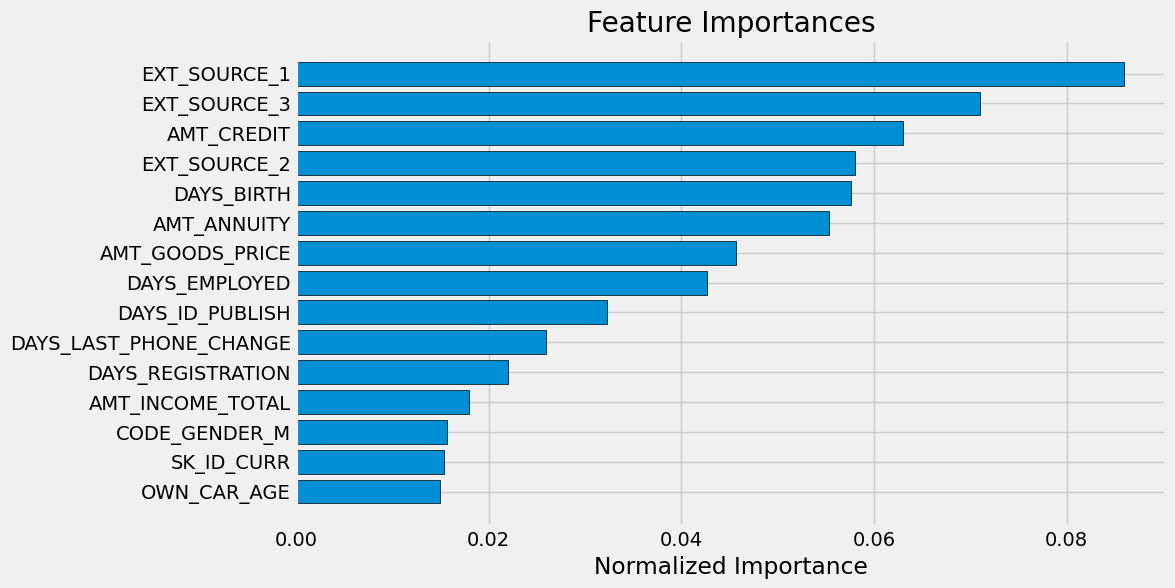

In [55]:
# Feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

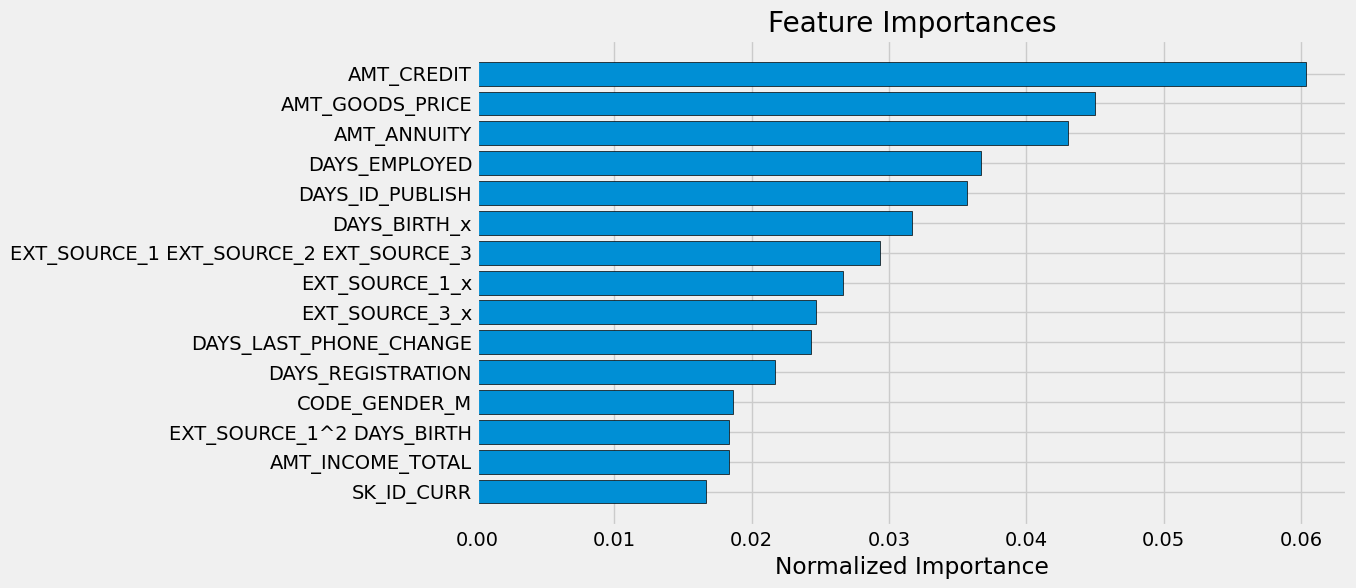

In [83]:
# Feature importances for the polynomial features
feature_importances_sorted = plot_feature_importances(feature_importances_poly)

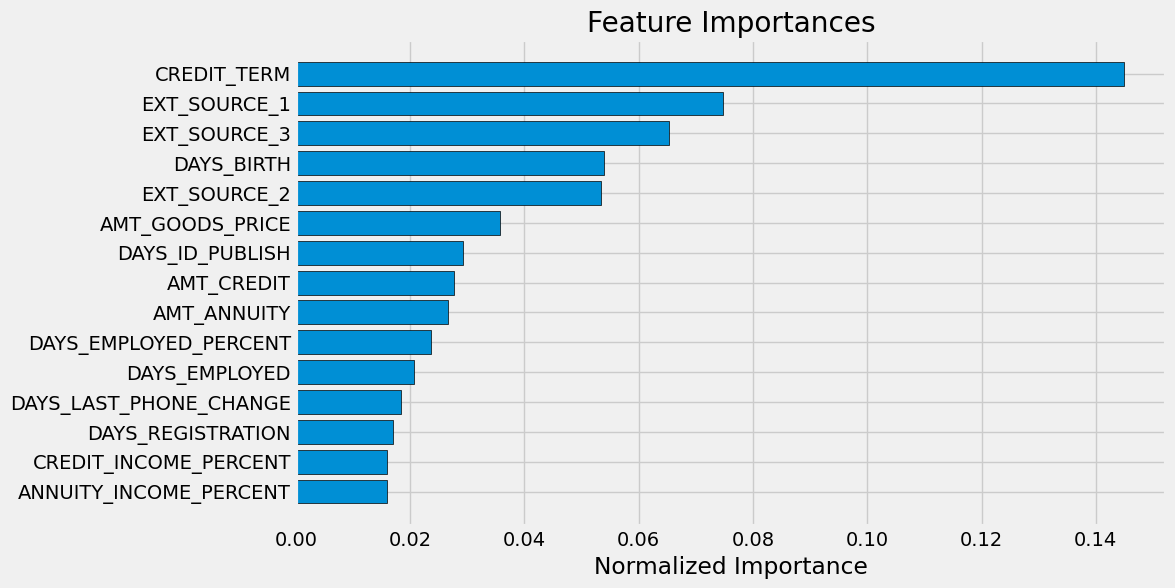

In [79]:
# Feature importances for the additional features
feature_importances_domain_sorted = plot_feature_importances(feature_importances_domain)

## Shap

In [81]:
import numpy as np
import shap
from tqdm import tqdm

explainer = shap.TreeExplainer(model)
batch_size = 100  # Adjust based on data size
shap_values_list = []

for i in tqdm(range(0, len(domain_features), batch_size), desc="Calculating SHAP"):
    batch = domain_features[i:i+batch_size]
    shap_batch = explainer.shap_values(batch)
    shap_values_list.append(shap_batch)

# Combine results (handles both regression & classification)
if isinstance(shap_values_list[0], list):
    # Multi-class classification
    shap_values = [np.vstack([batch[c] for batch in shap_values_list])
                  for c in range(len(shap_values_list[0]))]
else:
    # Regression or binary classification
    shap_values = np.vstack(shap_values_list)

Calculating SHAP: 100%|██████████| 3076/3076 [05:33<00:00,  9.22it/s]


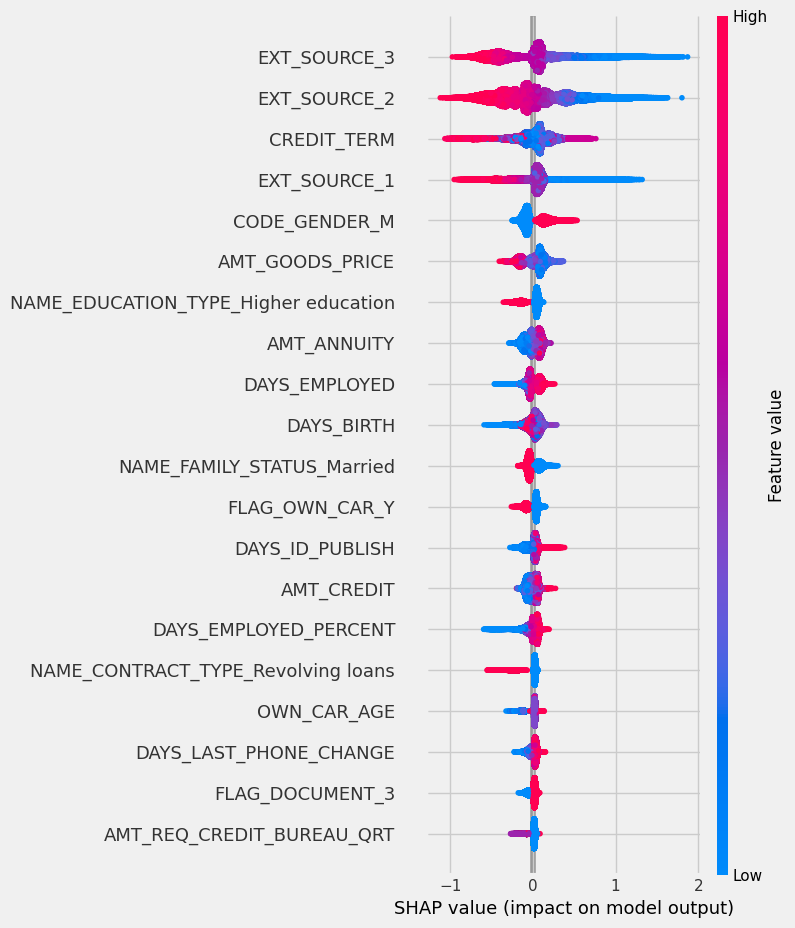

In [82]:
shap.summary_plot(shap_values, domain_features, feature_names=domain_features_names)

## End